# 🧠 Computer Vision Basics – Lecture 3

### Topic: Face Detection (Ready‑Made Model) – Very Simple

**Instructor:** Azeem Aslam
<br>
**Institute:** UVAS / NAVTTC


# What you will learn today

### Important: Detection vs Recognition 

#### Face Detection
> “There is a face here” (draw a box)

#### Face Recognition
>“This face is Azeem / Ali / Sara” (identity)

Today we ONLY do **detection,** not identity.

In [144]:
import cv2

In [145]:
import matplotlib.pyplot as plt

# Step 1: Load an image
### Option A (Recommended for class): local image path

Put an image on your PC and set the path below.

### Option B: download from internet (works in most places)
We will use a stable “raw” image link (less blocking)

In [146]:
# Option A

img = cv2.imread("one_person.jpeg")

if img is None:
    print ("Image not found. If you don't have group.jpg, use Option B (internet).")
else:
    print("Image loaded:", img.shape)


Image loaded: (1280, 960, 3)


# Option B (Internet Image) – only if needed
Some websites block downloads.
<br>
This method sends a browser-like header.

Run this cell ONLY if Option A didn't work.

In [147]:
import numpy as np
import urllib.request  as ul

In [149]:
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"

try:
    req = ul.Request(url, headers={"User-Agent": "Mozilla/5.0"})
    resp = ul.urlopen(req)
    image_data = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    image = cv2.imdecode(image_data, cv2.IMREAD_COLOR)

    print (" Internet image loaded." , image.shape)
except Exception as e:
    print(" Internet load failed:", e)

 Internet image loaded. (512, 512, 3)


# Step 2: Show the image
OpenCV loads BGR, Matplotlib shows RGB, so we convert.

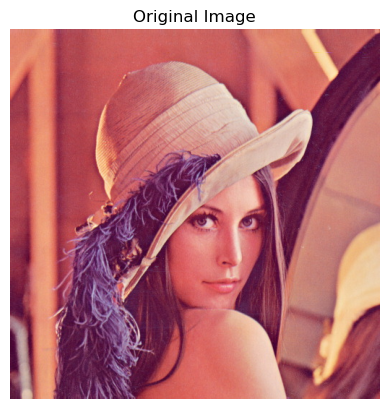

In [150]:
if image is not None:
    img_rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Original Image")
    plt.show()

# Step 3: Load the Face Detector (Haar Cascade)
Think of this as a “face finding machine” that is already trained.

OpenCV already includes the file path via: `cv2.data.haarcascades`



In [151]:
face_cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"

face_cascade = cv2.CascadeClassifier(face_cascade_path)

print(" Loaded cascade file:", face_cascade_path)

 Loaded cascade file: C:\Users\User\anaconda3\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml


## What this code is for

This code is used for **face detection** in OpenCV using **Haar Cascade Classifier**.

### Line-by-line explanation

```python
face_cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
```

👉 This builds the **full path** of the Haar cascade XML file that OpenCV already provides.

```python
face_cascade = cv2.CascadeClassifier(face_cascade_path)
```

👉 This loads the **pre-trained face detection model** into OpenCV so it can detect faces in images or video.

---


## One-line 

> Haar Cascade Classifier is used to detect faces by scanning an image using pre-trained features.



# Step 4: Convert to grayscale (detector works better)
Detectors usually work on grayscale because it is simpler.

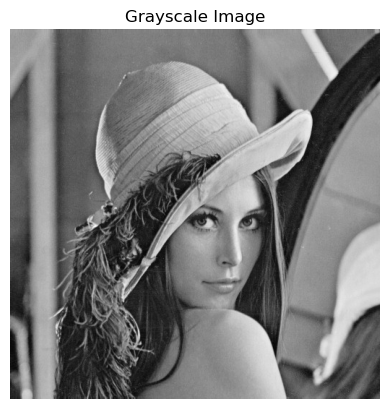

In [152]:
if img is not None:
    gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap="gray")
    plt.axis("off")
    plt.title("Grayscale Image")
    plt.show()


# Step 5: Detect faces

We use: `detectMultiScale()
`
#### Easy meaning of the main settings:
- **scaleFactor:** how much we shrink the image each step (1.1 is common)
- **minNeighbors:** how strict the detector is (higher = fewer false faces)
- **minSize:** ignore very small faces

In [153]:
faces = face_cascade.detectMultiScale(
    gray, 
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(40 , 40)
)

print("Faces found:", len(faces))
print("Face boxes (x, y, w, h):", faces[:5])

Faces found: 1
Face boxes (x, y, w, h): [[219 203 169 169]]


# Step 6: Draw rectangles on faces (WOW moment)
We draw a green box on each detected face.

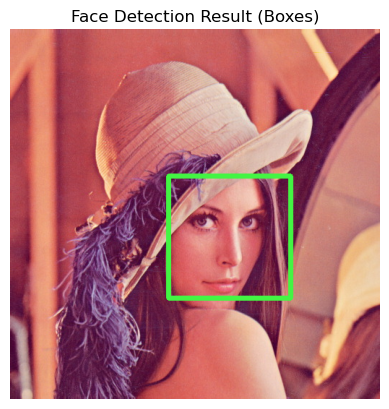

In [156]:
img_faces= image.copy()

for (x , y , w , h) in faces:
    cv2.rectangle(img_faces , (x , y) , (x+w , y+h) , (67,245,67) , 5)

img_faces_rgb = cv2.cvtColor(img_faces, cv2.COLOR_BGR2RGB)
plt.imshow(img_faces_rgb)
plt.axis("off")
plt.title("Face Detection Result (Boxes)")
plt.show()

# Step 7: Save the output image
We save it inside `outputs_lecture3/` .

In [48]:
import os

In [49]:
out_dir = "outputs_lecture3"

os.makedirs(out_dir , exist_ok = True)

cv2.imwrite(os.path.join(out_dir , "face_detected.jpg") , img_faces)

print("Image Save Successfully at Path : " , out_dir)

Image Save Successfully at Path :  outputs_lecture3


# 🧪 Mini Practice 
1. Try another photo with 2–3 people
2. Change minNeighbors:
    - 3 → more detections (more mistakes)
    - 7 → fewer detections (more strict)   
3. Detect faces
4. Save output

Write the number of faces you got.

In [127]:
# Load image with many people
import cv2 
import matplotlib.pyplot as plt

image = cv2.imread("group_1.jpg")

if img is None:
    print ("Image not found. If you don't have group.jpg, use Option B (internet).")
else:
    print("Image loaded:", img.shape)

Image loaded: (1280, 960, 3)


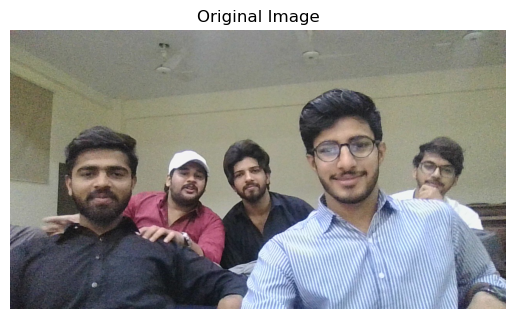

In [128]:
# Show image

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.title("Original Image")
plt.show()

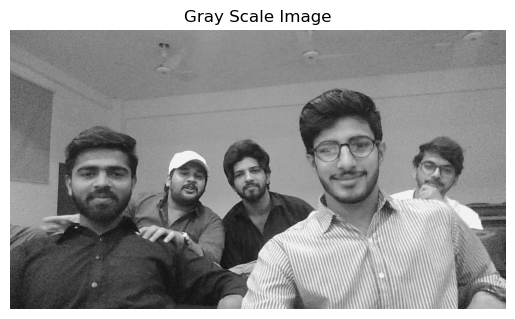

In [129]:
#  Gray image

gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

plt.imshow(gray , cmap="gray")
plt.axis("off")
plt.title("Gray Scale Image")
plt.show()

In [130]:
# Load the Face Detector (Haar Cascade)

face_cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"

face_cascade = cv2.CascadeClassifier(face_cascade_path)

if face_cascade.empty():
    print("Haar Cascade NOT loaded")
else:
    print("Haar Cascade loaded successfully")

Haar Cascade loaded successfully


In [133]:
# Detect faces

faces =  face_cascade.detectMultiScale(
    gray , 
    scaleFactor=1.1,
    minNeighbors = 7,
    minSize=(30,30)
)

print("Total Faces : " , len(faces))
print("Faces boxs (x , y , w , h ) : \n" , faces[:7])

Total Faces :  5
Faces boxs (x , y , w , h ) : 
 [[ 751  209  234  234]
 [ 563  326  106  106]
 [ 412  328  111  111]
 [ 146  296  183  183]
 [1048  314  108  108]]


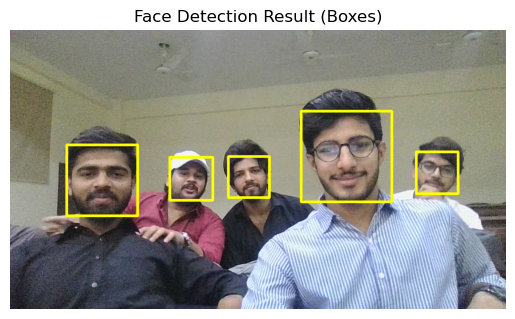

In [134]:
# Draw a rectangle

img_faces = image.copy()

for (x, y, w , h) in faces:
    cv2.rectangle(img_faces , (x,y) , (x+w, y+h) , (0 , 255 , 255) , 5)

img_faces_rgb = cv2.cvtColor(img_faces, cv2.COLOR_BGR2RGB)
plt.imshow(img_faces_rgb)
plt.axis("off")
plt.title("Face Detection Result (Boxes)")
plt.show()

In [80]:
# save detect image 

import os

out_dir = "outputs_lecture3"

os.makedirs(out_dir  ,  exist_ok = True)

cv2.imwrite(os.path.join(out_dir , "group_detect.jpg"), img_faces)

print("Image Save.")

Image Save.


# Summary
- Face detection = “where is the face?”
- We used a ready-made detector (no training)
- Steps:
    1. load image
    2. grayscale
    3. detect faces
    4. draw boxes
    5. save output